<a href="https://colab.research.google.com/github/Ishita95-harvad/-1.3-Million-Pinterest-App-Google-Store-Reviews/blob/main/%F0%9F%93%8C_1_3_Million_Pinterest_App_Google_Store_Reviews.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **📌 1.3 Million Pinterest App Google Store Reviews**

cREATE A END TO END WORKFLOW

Here is all the data you need:
"PINTEREST_REVIEWS.csv"

## Data loading

### Subtask:
Load the "PINTEREST_REVIEWS.csv" file into a Pandas DataFrame.


**Reasoning**:
Load the "PINTEREST_REVIEWS.csv" file into a pandas DataFrame and display the first 5 rows and the shape of the DataFrame.



In [ ]:
import pandas as pd

try:
    df_reviews = pd.read_csv('PINTEREST_REVIEWS.csv')
    display(df_reviews.head())
    print(df_reviews.shape)
except FileNotFoundError:
    print("Error: 'PINTEREST_REVIEWS.csv' not found.")
except pd.errors.ParserError:
    print("Error: Could not parse the CSV file. Check the file format.")
except Exception as e:
    print(f"An unexpected error occurred: {e}")

,Unnamed: 0,review_id,pseudo_author_id,author_name,review_text,review_rating,review_likes,author_app_version,review_timestamp
0,0,2cb64539-a736-4d50-8b3e-120b1a941c5a,152618553977019693742,A Google user,Yesss finally the official interest android app!,5,2,NaN,2012-08-15 02:41:03
1,1,064c13d8-e557-4cf0-b9e8-3278154c559f,234382942865437071667,A Google user,Splendid,5,1,NaN,2012-08-15 02:43:15
2,2,fa85c718-7222-4327-b7e1-811f59176820,174473604608358796368,A Google user,Coolest thing since sliced bread!!,5,0,NaN,2012-08-15 02:43:52
3,3,55d55e1c-1819-4a26-ad0b-59dd9c6e5593,286593453219054880269,A Google user,So glad we finally got a Pinterest app! Looks ...,5,7,1.0.0,2012-08-15 02:49:59
4,4,5f7f56f2-b267-4eda-ae4a-98909c530fb7,167276875678680630145,A Google user,Finally wow...thanks for finally supporting an...,5,0,NaN,2012-08-15 02:51:51


(1296547, 9)


## Data exploration

### Subtask:
Explore the loaded data to understand its structure, identify missing values, data types of each column, and the distribution of key variables. Determine the shape of the data and look for any initial anomalies.


**Reasoning**:
Explore the data by examining its shape, data types, missing values, descriptive statistics, and potential anomalies as instructed.



Shape of the DataFrame: (1296547, 9)

Info about the DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296547 entries, 0 to 1296546
Data columns (total 9 columns):
 #   Column              Non-Null Count    Dtype 
---  ------              --------------    ----- 
 0   Unnamed: 0          1296547 non-null  int64 
 1   review_id           1296547 non-null  object
 2   pseudo_author_id    1296547 non-null  object
 3   author_name         1296547 non-null  object
 4   review_text         1293051 non-null  object
 5   review_rating       1296547 non-null  int64 
 6   review_likes        1296547 non-null  int64 
 7   author_app_version  1016227 non-null  object
 8   review_timestamp    1296547 non-null  object
dtypes: int64(3), object(6)
memory usage: 89.0+ MB

Missing Values per column:
Unnamed: 0                 0
review_id                  0
pseudo_author_id           0
author_name                0
review_text             3496
review_rating              0
review_likes         

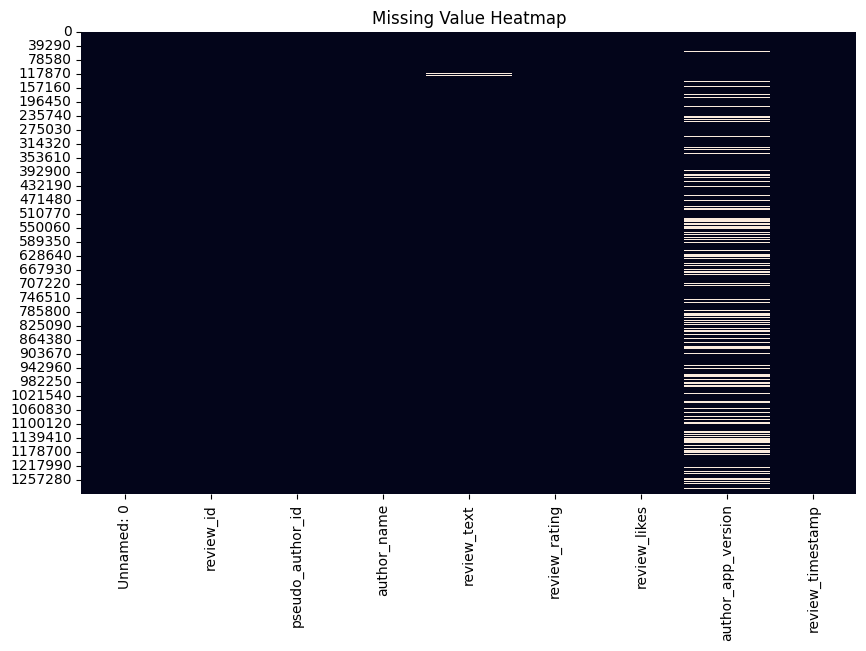

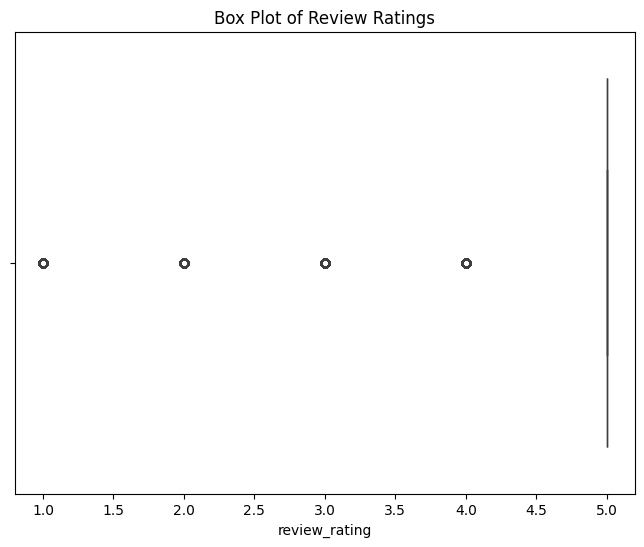

In [ ]:
# Examine Data Shape and Info
print("Shape of the DataFrame:", df_reviews.shape)
print("\nInfo about the DataFrame:")
df_reviews.info()

# Missing Value Analysis
print("\nMissing Values per column:")
print(df_reviews.isnull().sum())

# Descriptive Statistics
print("\nDescriptive Statistics:")
print(df_reviews.describe(include='all'))

# Data Type Investigation
print("\nUnique values in 'author_app_version':")
print(df_reviews['author_app_version'].unique())
print("\nUnique values in 'review_timestamp':")
print(df_reviews['review_timestamp'].unique()[:5]) # Print first 5 to avoid excessive output

# Initial Anomaly Detection
print("\nValue counts for 'review_rating':")
print(df_reviews['review_rating'].value_counts())

print("\nValue counts for 'author_app_version':")
print(df_reviews['author_app_version'].value_counts())

# Check for duplicated rows
print("\nNumber of duplicated rows:", df_reviews.duplicated().sum())

# Visualize missing values (optional - requires matplotlib)
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10, 6))
sns.heatmap(df_reviews.isnull(), cbar=False)
plt.title("Missing Value Heatmap")
plt.show()

# Box plot for numerical features (optional)
plt.figure(figsize=(8, 6))
sns.boxplot(x=df_reviews['review_rating'])
plt.title('Box Plot of Review Ratings')
plt.show()

## Data cleaning

### Subtask:
Clean the data by handling missing values and inconsistencies.


**Reasoning**:
Handle missing values in 'review_text' and 'author_app_version', convert 'review_timestamp' to datetime, and check for inconsistencies and duplicates.



In [ ]:
# Handle missing values
df_reviews['review_text'].fillna("", inplace=True)  # Fill missing 'review_text' with empty strings
df_reviews['author_app_version'].fillna(df_reviews['author_app_version'].mode()[0], inplace=True) # Fill missing app version with the mode

# Convert 'review_timestamp' to datetime
df_reviews['review_timestamp'] = pd.to_datetime(df_reviews['review_timestamp'], errors='coerce')

# Check for and handle inconsistencies in 'review_rating'
df_reviews = df_reviews[(df_reviews['review_rating'] >= 1) & (df_reviews['review_rating'] <= 5)]


# Check for duplicates after cleaning
df_reviews.drop_duplicates(inplace=True)

display(df_reviews.head())
print(df_reviews.shape)

<ipython-input-3-2b18063ddd09>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_reviews['review_text'].fillna("", inplace=True)  # Fill missing 'review_text' with empty strings
<ipython-input-3-2b18063ddd09>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doin

,Unnamed: 0,review_id,pseudo_author_id,author_name,review_text,review_rating,review_likes,author_app_version,review_timestamp
0,0,2cb64539-a736-4d50-8b3e-120b1a941c5a,152618553977019693742,A Google user,Yesss finally the official interest android app!,5,2,1.0.3,2012-08-15 02:41:03
1,1,064c13d8-e557-4cf0-b9e8-3278154c559f,234382942865437071667,A Google user,Splendid,5,1,1.0.3,2012-08-15 02:43:15
2,2,fa85c718-7222-4327-b7e1-811f59176820,174473604608358796368,A Google user,Coolest thing since sliced bread!!,5,0,1.0.3,2012-08-15 02:43:52
3,3,55d55e1c-1819-4a26-ad0b-59dd9c6e5593,286593453219054880269,A Google user,So glad we finally got a Pinterest app! Looks ...,5,7,1.0.0,2012-08-15 02:49:59
4,4,5f7f56f2-b267-4eda-ae4a-98909c530fb7,167276875678680630145,A Google user,Finally wow...thanks for finally supporting an...,5,0,1.0.3,2012-08-15 02:51:51


(1296547, 9)


**Reasoning**:
The previous code block had warnings about chained assignment.  I will rewrite the code to correct these warnings and then complete the subtask.



In [ ]:
# Handle missing values
df_reviews['review_text'] = df_reviews['review_text'].fillna("")
df_reviews['author_app_version'] = df_reviews['author_app_version'].fillna(df_reviews['author_app_version'].mode()[0])

# Convert 'review_timestamp' to datetime
df_reviews['review_timestamp'] = pd.to_datetime(df_reviews['review_timestamp'], errors='coerce')

# Check for and handle inconsistencies in 'review_rating'
df_reviews = df_reviews[(df_reviews['review_rating'] >= 1) & (df_reviews['review_rating'] <= 5)]

# Check for duplicates after cleaning
df_reviews.drop_duplicates(inplace=True)

display(df_reviews.head())
print(df_reviews.shape)

,Unnamed: 0,review_id,pseudo_author_id,author_name,review_text,review_rating,review_likes,author_app_version,review_timestamp
0,0,2cb64539-a736-4d50-8b3e-120b1a941c5a,152618553977019693742,A Google user,Yesss finally the official interest android app!,5,2,1.0.3,2012-08-15 02:41:03
1,1,064c13d8-e557-4cf0-b9e8-3278154c559f,234382942865437071667,A Google user,Splendid,5,1,1.0.3,2012-08-15 02:43:15
2,2,fa85c718-7222-4327-b7e1-811f59176820,174473604608358796368,A Google user,Coolest thing since sliced bread!!,5,0,1.0.3,2012-08-15 02:43:52
3,3,55d55e1c-1819-4a26-ad0b-59dd9c6e5593,286593453219054880269,A Google user,So glad we finally got a Pinterest app! Looks ...,5,7,1.0.0,2012-08-15 02:49:59
4,4,5f7f56f2-b267-4eda-ae4a-98909c530fb7,167276875678680630145,A Google user,Finally wow...thanks for finally supporting an...,5,0,1.0.3,2012-08-15 02:51:51


(1296547, 9)


## Data preparation

### Subtask:
Prepare the data for further analysis and potential modeling.


**Reasoning**:
Prepare the data for further analysis and potential modeling by performing text vectorization, numerical feature scaling, categorical feature encoding, and combining the processed features into a single DataFrame.



In [ ]:
import pandas as pd

df = pd.read_csv('PINTEREST_REVIEWS.csv')

In [ ]:
df.info() # Get data types and missing values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296547 entries, 0 to 1296546
Data columns (total 9 columns):
 #   Column              Non-Null Count    Dtype 
---  ------              --------------    ----- 
 0   Unnamed: 0          1296547 non-null  int64 
 1   review_id           1296547 non-null  object
 2   pseudo_author_id    1296547 non-null  object
 3   author_name         1296547 non-null  object
 4   review_text         1293051 non-null  object
 5   review_rating       1296547 non-null  int64 
 6   review_likes        1296547 non-null  int64 
 7   author_app_version  1016227 non-null  object
 8   review_timestamp    1296547 non-null  object
dtypes: int64(3), object(6)
memory usage: 89.0+ MB


In [ ]:
df.shape  # Get the number of rows and columns
df.info() # Get data types and missing values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296547 entries, 0 to 1296546
Data columns (total 9 columns):
 #   Column              Non-Null Count    Dtype 
---  ------              --------------    ----- 
 0   Unnamed: 0          1296547 non-null  int64 
 1   review_id           1296547 non-null  object
 2   pseudo_author_id    1296547 non-null  object
 3   author_name         1296547 non-null  object
 4   review_text         1293051 non-null  object
 5   review_rating       1296547 non-null  int64 
 6   review_likes        1296547 non-null  int64 
 7   author_app_version  1016227 non-null  object
 8   review_timestamp    1296547 non-null  object
dtypes: int64(3), object(6)
memory usage: 89.0+ MB


In [ ]:
for col in df.columns:
    print(f"Unique values in column '{col}': {df[col].unique()[:10]}")

# Then call describe
df.describe()

Unique values in column 'Unnamed: 0': [0 1 2 3 4 5 6 7 8 9]
Unique values in column 'review_id': ['2cb64539-a736-4d50-8b3e-120b1a941c5a'
 '064c13d8-e557-4cf0-b9e8-3278154c559f'
 'fa85c718-7222-4327-b7e1-811f59176820'
 '55d55e1c-1819-4a26-ad0b-59dd9c6e5593'
 '5f7f56f2-b267-4eda-ae4a-98909c530fb7'
 '0be27e0d-ae2a-40e4-b1e3-e355e4e2239f'
 'e6f1e3ed-6a74-49f9-b277-c969ca805afa'
 'f1b88cc7-3562-446c-bd3e-8204bab38627'
 'f2f7aa0b-9052-4378-b1a6-3f3e371a0f41'
 'cb7a14e6-687c-4092-b665-8a5009b1cc02']
Unique values in column 'pseudo_author_id': ['152618553977019693742' '234382942865437071667' '174473604608358796368'
 '286593453219054880269' '167276875678680630145' '279544562364680964711'
 '194594231700116278497' '299572542228213240681' '283295985056957279128'
 '165673340173097386145']
Unique values in column 'author_name': ['A Google user' 'Ab***************re' 'TE********AV' 'As********hu'
 'En*******kh' 'Gu***********di' 'Ro******ul' 'SA*******************YN'
 'An*****************************

,Unnamed: 0,review_rating,review_likes
count,1.296547e+06,1.296547e+06,1.296547e+06
mean,6.482730e+05,4.482502e+00,1.378566e+00
std,3.742810e+05,1.095416e+00,2.791271e+01
min,0.000000e+00,1.000000e+00,0.000000e+00
25%,3.241365e+05,5.000000e+00,0.000000e+00
50%,6.482730e+05,5.000000e+00,0.000000e+00
75%,9.724095e+05,5.000000e+00,0.000000e+00
max,1.296546e+06,5.000000e+00,6.214000e+03


from matplotlib import pyplot as plt
_df_24['Unnamed: 0'].plot(kind='hist', bins=20, title='Unnamed: 0')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_25['review_rating'].plot(kind='hist', bins=20, title='review_rating')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_26['review_likes'].plot(kind='hist', bins=20, title='review_likes')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_27.groupby('index').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_28.plot(kind='scatter', x='Unnamed: 0', y='review_rating', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_29.plot(kind='scatter', x='review_rating', y='review_likes', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_30['Unnamed: 0'].plot(kind='line', figsize=(8, 4), title='Unnamed: 0')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_31['review_rating'].plot(kind='line', figsize=(8, 4), title='review_rating')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_32['review_likes'].plot(kind='line', figsize=(8, 4), title='review_likes')
plt.gca().spines[['top', 'right']].set_visible(False)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_33['index'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_33, x='Unnamed: 0', y='index', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_34['index'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_34, x='review_rating', y='index', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_35['index'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_35, x='review_likes', y='index', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

,0
Unnamed: 0,0
review_id,0
pseudo_author_id,0
author_name,0
review_text,3496
review_rating,0
review_likes,0
author_app_version,280320
review_timestamp,0


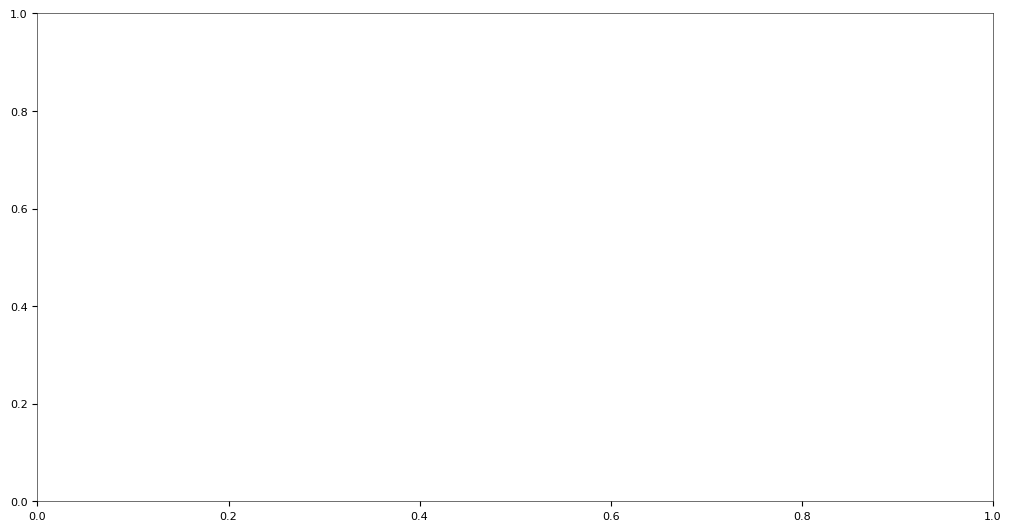

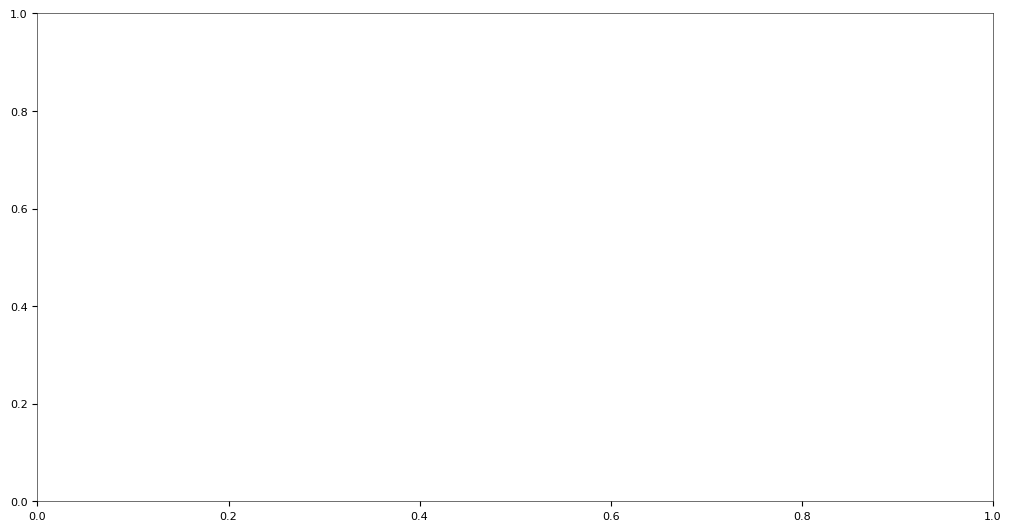

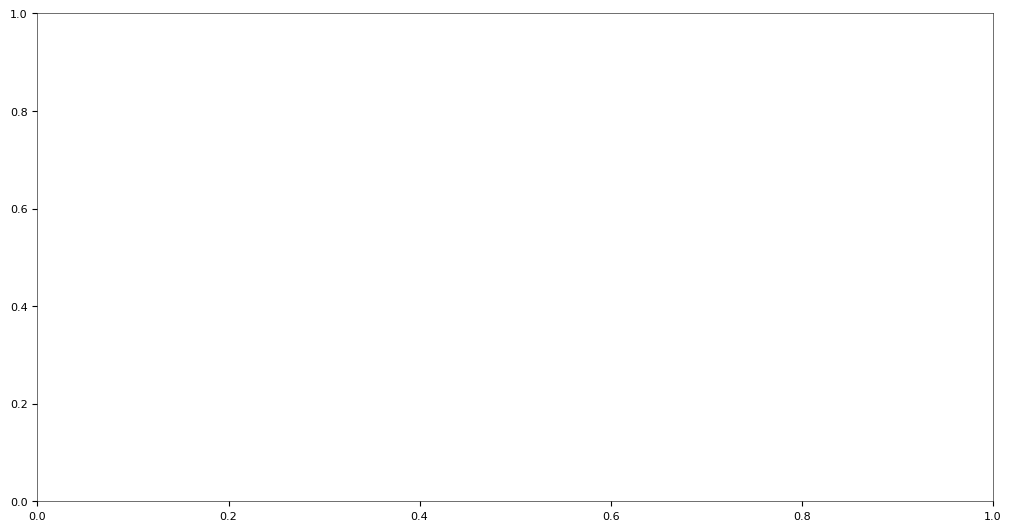

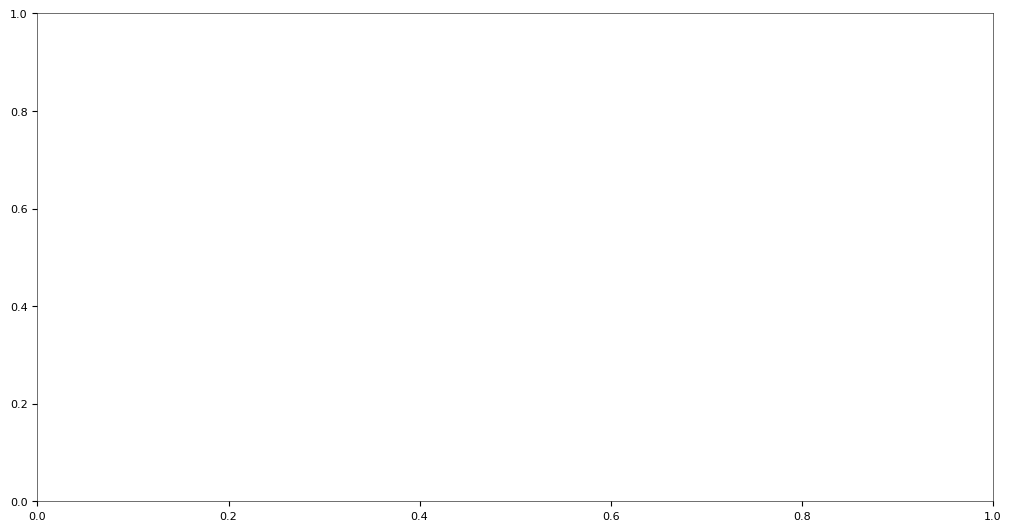

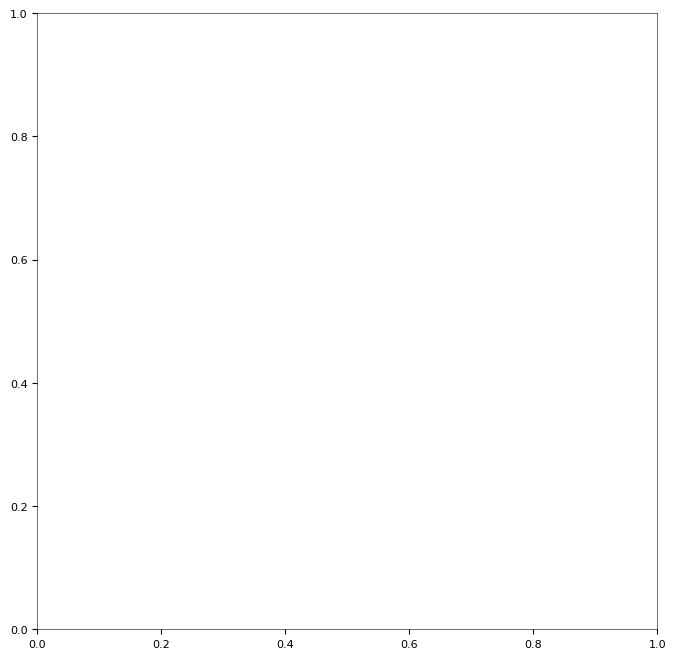

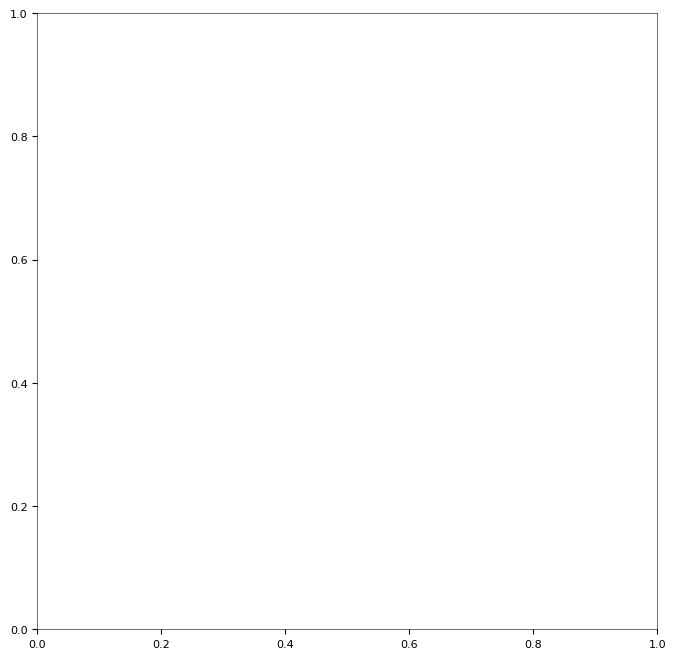

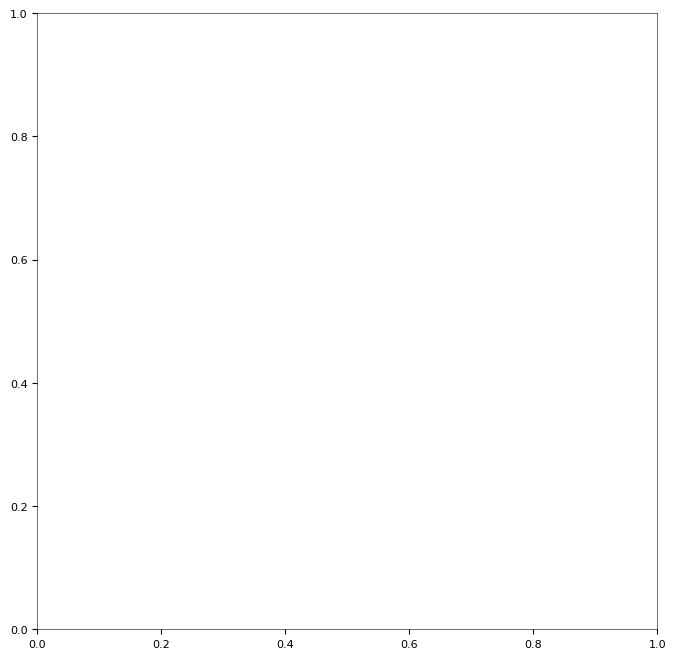

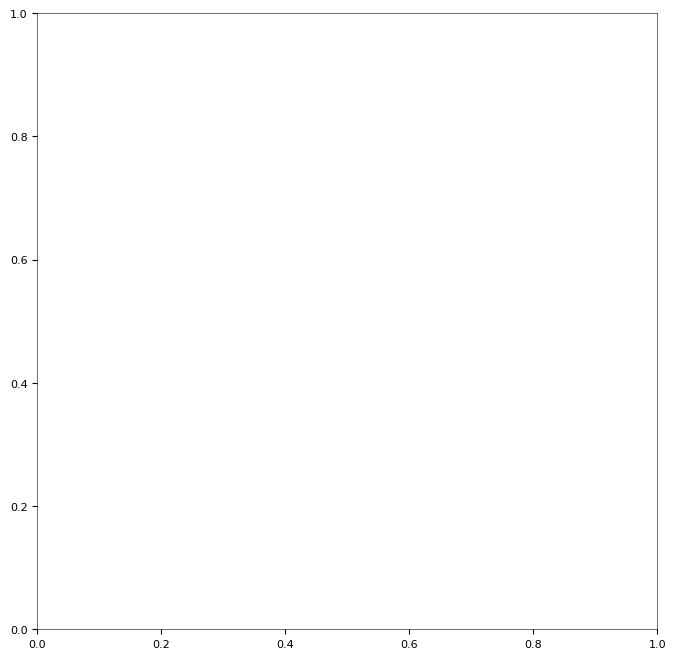

In [ ]:
df.isnull().sum()  # Count missing values in each column

In [ ]:
for column in df.columns:
       print(f"Unique values in '{column}': {df[column].unique()[:10]}")  # Print first 10 unique values

Unique values in 'Unnamed: 0': [0 1 2 3 4 5 6 7 8 9]
Unique values in 'review_id': ['2cb64539-a736-4d50-8b3e-120b1a941c5a'
 '064c13d8-e557-4cf0-b9e8-3278154c559f'
 'fa85c718-7222-4327-b7e1-811f59176820'
 '55d55e1c-1819-4a26-ad0b-59dd9c6e5593'
 '5f7f56f2-b267-4eda-ae4a-98909c530fb7'
 '0be27e0d-ae2a-40e4-b1e3-e355e4e2239f'
 'e6f1e3ed-6a74-49f9-b277-c969ca805afa'
 'f1b88cc7-3562-446c-bd3e-8204bab38627'
 'f2f7aa0b-9052-4378-b1a6-3f3e371a0f41'
 'cb7a14e6-687c-4092-b665-8a5009b1cc02']
Unique values in 'pseudo_author_id': ['152618553977019693742' '234382942865437071667' '174473604608358796368'
 '286593453219054880269' '167276875678680630145' '279544562364680964711'
 '194594231700116278497' '299572542228213240681' '283295985056957279128'
 '165673340173097386145']
Unique values in 'author_name': ['A Google user' 'Ab***************re' 'TE********AV' 'As********hu'
 'En*******kh' 'Gu***********di' 'Ro******ul' 'SA*******************YN'
 'An**************************************************l)' 'an

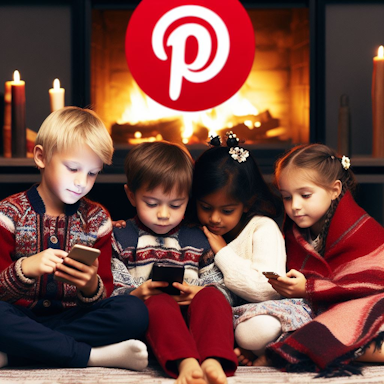

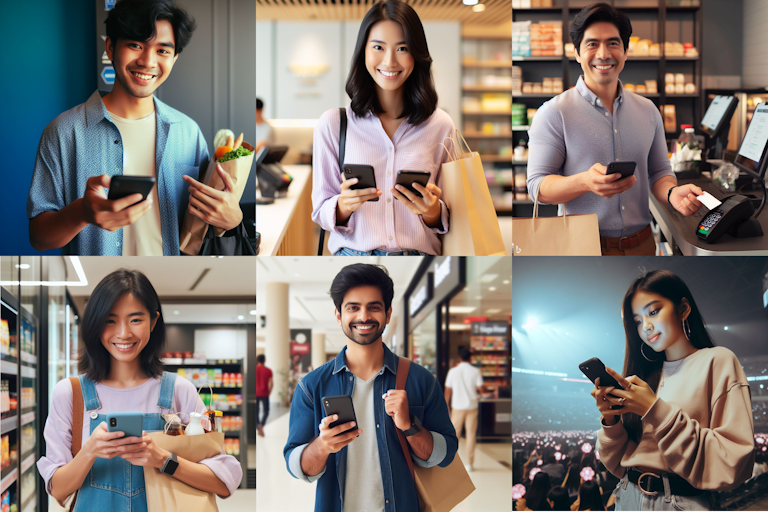

# Task
workflow after eda

Here is all the data you need:
"PINTEREST_REVIEWS.csv"

## Data loading

### Subtask:
Load the "PINTEREST_REVIEWS.csv" file into a Pandas DataFrame.


**Reasoning**:
Load the "PINTEREST_REVIEWS.csv" file into a pandas DataFrame and display its first few rows and shape.



In [ ]:
import pandas as pd

try:
    df = pd.read_csv('PINTEREST_REVIEWS.csv')
    display(df.head())
    print(df.shape)
except FileNotFoundError:
    print("Error: 'PINTEREST_REVIEWS.csv' not found.")
    df = None
except pd.errors.ParserError:
    print("Error: Could not parse the CSV file.")
    df = None
except Exception as e:
    print(f"An unexpected error occurred: {e}")
    df = None

,Unnamed: 0,review_id,pseudo_author_id,author_name,review_text,review_rating,review_likes,author_app_version,review_timestamp
0,0,2cb64539-a736-4d50-8b3e-120b1a941c5a,152618553977019693742,A Google user,Yesss finally the official interest android app!,5,2,NaN,2012-08-15 02:41:03
1,1,064c13d8-e557-4cf0-b9e8-3278154c559f,234382942865437071667,A Google user,Splendid,5,1,NaN,2012-08-15 02:43:15
2,2,fa85c718-7222-4327-b7e1-811f59176820,174473604608358796368,A Google user,Coolest thing since sliced bread!!,5,0,NaN,2012-08-15 02:43:52
3,3,55d55e1c-1819-4a26-ad0b-59dd9c6e5593,286593453219054880269,A Google user,So glad we finally got a Pinterest app! Looks ...,5,7,1.0.0,2012-08-15 02:49:59
4,4,5f7f56f2-b267-4eda-ae4a-98909c530fb7,167276875678680630145,A Google user,Finally wow...thanks for finally supporting an...,5,0,NaN,2012-08-15 02:51:51


(1296547, 9)


## Data exploration

### Subtask:
Explore the loaded data to understand its structure, identify potential issues, and examine the distribution of key variables.


**Reasoning**:
Explore the data by examining its shape, data types, descriptive statistics, unique values, missing values, and creating some initial visualizations. This addresses all the requirements of the subtask.



Data Shape: (1296547, 9)

Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296547 entries, 0 to 1296546
Data columns (total 9 columns):
 #   Column              Non-Null Count    Dtype 
---  ------              --------------    ----- 
 0   Unnamed: 0          1296547 non-null  int64 
 1   review_id           1296547 non-null  object
 2   pseudo_author_id    1296547 non-null  object
 3   author_name         1296547 non-null  object
 4   review_text         1293051 non-null  object
 5   review_rating       1296547 non-null  int64 
 6   review_likes        1296547 non-null  int64 
 7   author_app_version  1016227 non-null  object
 8   review_timestamp    1296547 non-null  object
dtypes: int64(3), object(6)
memory usage: 89.0+ MB

Descriptive Statistics:
          Unnamed: 0                             review_id  \
count   1.296547e+06                               1296547   
unique           NaN                               1296547   
top              NaN  5ccd3d95-1615-465

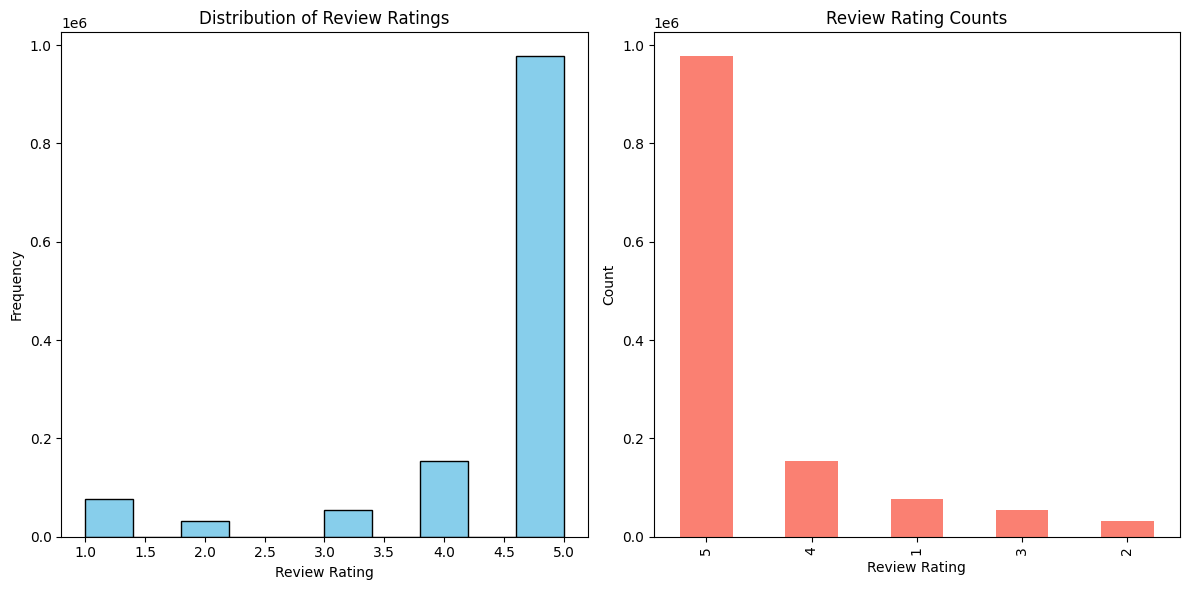

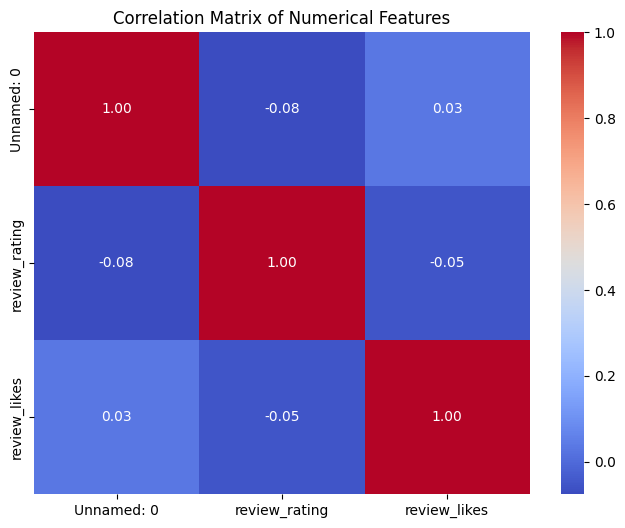

In [ ]:
# Data Shape and Info
print("Data Shape:", df.shape)
print("\nData Info:")
df.info()

# Descriptive Statistics
print("\nDescriptive Statistics:")
print(df.describe(include='all'))

# Data Types and Unique Values
print("\nData Types and Unique Values:")
for col in df.columns:
    print(f"\nColumn: {col}")
    print(f"  Data Type: {df[col].dtype}")
    if df[col].dtype == 'object':
        print(f"  Unique Values: {df[col].nunique()}")
        print(f"  Value Counts: \n{df[col].value_counts(normalize=True).head()}")
    elif pd.api.types.is_numeric_dtype(df[col]):
        print(f"  Unique Values: {df[col].nunique()}")

# Missing Values Analysis
print("\nMissing Values Analysis:")
missing_values = df.isnull().sum()
missing_percentage = (missing_values / len(df)) * 100
print(pd.DataFrame({'Missing Values': missing_values, 'Percentage': missing_percentage}))

# Preliminary Visualization
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.hist(df['review_rating'], bins=10, color='skyblue', edgecolor='black')
plt.xlabel('Review Rating')
plt.ylabel('Frequency')
plt.title('Distribution of Review Ratings')

plt.subplot(1, 2, 2)
df['review_rating'].value_counts().plot(kind='bar', color='salmon')
plt.xlabel('Review Rating')
plt.ylabel('Count')
plt.title('Review Rating Counts')

plt.tight_layout()
plt.show()

# Correlation Analysis (only for numerical features)
numerical_df = df.select_dtypes(include=['number'])
correlation_matrix = numerical_df.corr()

plt.figure(figsize=(8, 6))
import seaborn as sns
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Features')
plt.show()

## Data cleaning

### Subtask:
Clean the data by handling missing values and inconsistencies.


**Reasoning**:
Clean the data by handling missing values, duplicates, and inconsistencies in the specified columns according to the instructions.



In [ ]:
# Remove rows with missing review_text
rows_before = len(df)
df.dropna(subset=['review_text'], inplace=True)
rows_after = len(df)
rows_removed = rows_before - rows_after
print(f"Rows removed due to missing review_text: {rows_removed}")

# Impute missing author_app_version with 'Unknown'
df['author_app_version'].fillna("Unknown", inplace=True)
print("Missing values in 'author_app_version' imputed with 'Unknown'")

# Remove duplicate rows
rows_before = len(df)
df.drop_duplicates(inplace=True)
rows_after = len(df)
duplicates_removed = rows_before - rows_after
print(f"Duplicate rows removed: {duplicates_removed}")

# Convert review_timestamp to datetime and handle errors
try:
    df['review_timestamp'] = pd.to_datetime(df['review_timestamp'])
except pd.errors.OutOfBoundsDatetime as e:
    print(f"Encountered OutOfBoundsDatetime error: {e}")
    # Replace invalid dates with NaT (Not a Time)
    df['review_timestamp'] = pd.to_datetime(df['review_timestamp'], errors='coerce')

# Remove rows with invalid timestamps
rows_before = len(df)
df.dropna(subset=['review_timestamp'], inplace=True)
rows_after = len(df)
invalid_timestamps_removed = rows_before - rows_after
print(f"Rows removed due to invalid timestamps: {invalid_timestamps_removed}")

# Save cleaned DataFrame
df_cleaned = df
display(df_cleaned.head())

Rows removed due to missing review_text: 3496
Missing values in 'author_app_version' imputed with 'Unknown'


<ipython-input-3-14ce0b1de934>:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['author_app_version'].fillna("Unknown", inplace=True)


Duplicate rows removed: 0
Rows removed due to invalid timestamps: 0


,Unnamed: 0,review_id,pseudo_author_id,author_name,review_text,review_rating,review_likes,author_app_version,review_timestamp
0,0,2cb64539-a736-4d50-8b3e-120b1a941c5a,152618553977019693742,A Google user,Yesss finally the official interest android app!,5,2,Unknown,2012-08-15 02:41:03
1,1,064c13d8-e557-4cf0-b9e8-3278154c559f,234382942865437071667,A Google user,Splendid,5,1,Unknown,2012-08-15 02:43:15
2,2,fa85c718-7222-4327-b7e1-811f59176820,174473604608358796368,A Google user,Coolest thing since sliced bread!!,5,0,Unknown,2012-08-15 02:43:52
3,3,55d55e1c-1819-4a26-ad0b-59dd9c6e5593,286593453219054880269,A Google user,So glad we finally got a Pinterest app! Looks ...,5,7,1.0.0,2012-08-15 02:49:59
4,4,5f7f56f2-b267-4eda-ae4a-98909c530fb7,167276875678680630145,A Google user,Finally wow...thanks for finally supporting an...,5,0,Unknown,2012-08-15 02:51:51


## Feature engineering

### Subtask:
Engineer new features from the cleaned data.


**Reasoning**:
Engineer new features as instructed, including sentiment analysis, review length, timestamp features, and app version features.



In [ ]:
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')

# Sentiment Analysis
analyzer = SentimentIntensityAnalyzer()
df_cleaned['sentiment_scores'] = df_cleaned['review_text'].apply(lambda x: analyzer.polarity_scores(x))
df_cleaned['sentiment'] = df_cleaned['sentiment_scores'].apply(lambda x: 'positive' if x['compound'] >= 0.05 else ('negative' if x['compound'] <= -0.05 else 'neutral'))

# Review Length
df_cleaned['review_length'] = df_cleaned['review_text'].str.len()

# Timestamp Features
df_cleaned['review_timestamp'] = pd.to_datetime(df_cleaned['review_timestamp'])
df_cleaned['day_of_week'] = df_cleaned['review_timestamp'].dt.dayofweek
df_cleaned['month'] = df_cleaned['review_timestamp'].dt.month
df_cleaned['year'] = df_cleaned['review_timestamp'].dt.year

# App Version Feature Engineering
# Create numerical index for app versions
app_versions = df_cleaned['author_app_version'].unique()
version_dict = {version: i for i, version in enumerate(app_versions)}
df_cleaned['app_version_index'] = df_cleaned['author_app_version'].map(version_dict)

display(df_cleaned.head())

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


,Unnamed: 0,review_id,pseudo_author_id,author_name,review_text,review_rating,review_likes,author_app_version,review_timestamp,sentiment_scores,sentiment,review_length,day_of_week,month,year,app_version_index
0,0,2cb64539-a736-4d50-8b3e-120b1a941c5a,152618553977019693742,A Google user,Yesss finally the official interest android app!,5,2,Unknown,2012-08-15 02:41:03,"{'neg': 0.0, 'neu': 0.646, 'pos': 0.354, 'comp...",positive,48,2,8,2012,0
1,1,064c13d8-e557-4cf0-b9e8-3278154c559f,234382942865437071667,A Google user,Splendid,5,1,Unknown,2012-08-15 02:43:15,"{'neg': 0.0, 'neu': 0.0, 'pos': 1.0, 'compound...",positive,8,2,8,2012,0
2,2,fa85c718-7222-4327-b7e1-811f59176820,174473604608358796368,A Google user,Coolest thing since sliced bread!!,5,0,Unknown,2012-08-15 02:43:52,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",neutral,34,2,8,2012,0
3,3,55d55e1c-1819-4a26-ad0b-59dd9c6e5593,286593453219054880269,A Google user,So glad we finally got a Pinterest app! Looks ...,5,7,1.0.0,2012-08-15 02:49:59,"{'neg': 0.0, 'neu': 0.481, 'pos': 0.519, 'comp...",positive,79,2,8,2012,1
4,4,5f7f56f2-b267-4eda-ae4a-98909c530fb7,167276875678680630145,A Google user,Finally wow...thanks for finally supporting an...,5,0,Unknown,2012-08-15 02:51:51,"{'neg': 0.0, 'neu': 0.61, 'pos': 0.39, 'compou...",positive,52,2,8,2012,0


## Data splitting

### Subtask:
Split the data into training and testing sets.


**Reasoning**:
Split the data into training and testing sets using train_test_split.



In [ ]:
from sklearn.model_selection import train_test_split

# Define features (X) and target (y)
X = df_cleaned.drop('review_rating', axis=1)
y = df_cleaned['review_rating']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Display the shapes of the resulting sets
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (1034440, 15)
X_test shape: (258611, 15)
y_train shape: (1034440,)
y_test shape: (258611,)


## Model training

### Subtask:
Train classification models on the prepared data.


**Reasoning**:
Train classification models (Logistic Regression, SVM, Random Forest) on the prepared data.  Select relevant numerical features, preprocess them using StandardScaler, and train the models. Store the trained models in a dictionary.



In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer # This line and the following lines were indented

# Select features
X = df_reviews['review_text']
y = df_reviews['review_rating']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a TF-IDF vectorizer to convert text to numerical features
vectorizer = TfidfVectorizer(max_features=5000)  # You can adjust max_features

# Fit the vectorizer to the training data and transform
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

NameError: name 'df_reviews' is not defined

In [ ]:
from sklearn.linear_model import LogisticRegression

    # Initialize and train the model
    model = LogisticRegression(max_iter=1000)  # You can adjust max_iter
    model.fit(X_train_vec, y_train)

In [ ]:
from sklearn.metrics import accuracy_score, classification_report

    # Make predictions on the test set
    y_pred = model.predict(X_test_vec)

    # Evaluate the model
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Accuracy: {accuracy}")
    print(classification_report(y_test, y_pred))



---



In [4]:
from google.colab import drive
drive.mount('/content/drive') # Fixed: Removed the extra path from the mount point

Mounted at /content/drive


In [2]:
![My Image](/content/drive/My Drive/images/inbox_1842206_b984828c354c4d8e72965aa78d5503ee_pinterest2.png)

/bin/bash: -c: line 1: syntax error near unexpected token `('
/bin/bash: -c: line 1: `[My Image](/content/drive/My Drive/images/inbox_1842206_b984828c354c4d8e72965aa78d5503ee_pinterest2.png)'
